<a href="https://colab.research.google.com/github/nephelim74/machinelearn/blob/main/mi_dz6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Работа с данными. Домашнее задание


## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [70]:
### YOUR CODE HERE ###
# pip install pandas numpy
import pandas as pd
import requests
from io import StringIO

# Ссылка на данные
url = "https://drive.usercontent.google.com/u/0/uc?id=1gGR58B860WtpfpyYsM75AxVODcrDkIx2&export=download"

# Загружаем данные по ссылке
response = requests.get(url)
response.raise_for_status()  # Проверяем, что запрос выполнен успешно

# Читаем данные в DataFrame
data = pd.read_csv(StringIO(response.text))

# Выводим первые пять строк
print(data.head())

   CustomerID   Genre   Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  19.0                15.0                      39
1           2    Male   NaN                 NaN                      81
2           3  Female   NaN                16.0                       6
3           4  Female  23.0                16.0                      77
4           5  Female  31.0                17.0                      40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [71]:
### YOUR CODE HERE ###
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Проверим, есть ли пропущенные значения в данных.
missing_values = data.isnull().sum()
print("Пропуски в данных:")
print(missing_values)

Пропуски в данных:
CustomerID                 0
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64


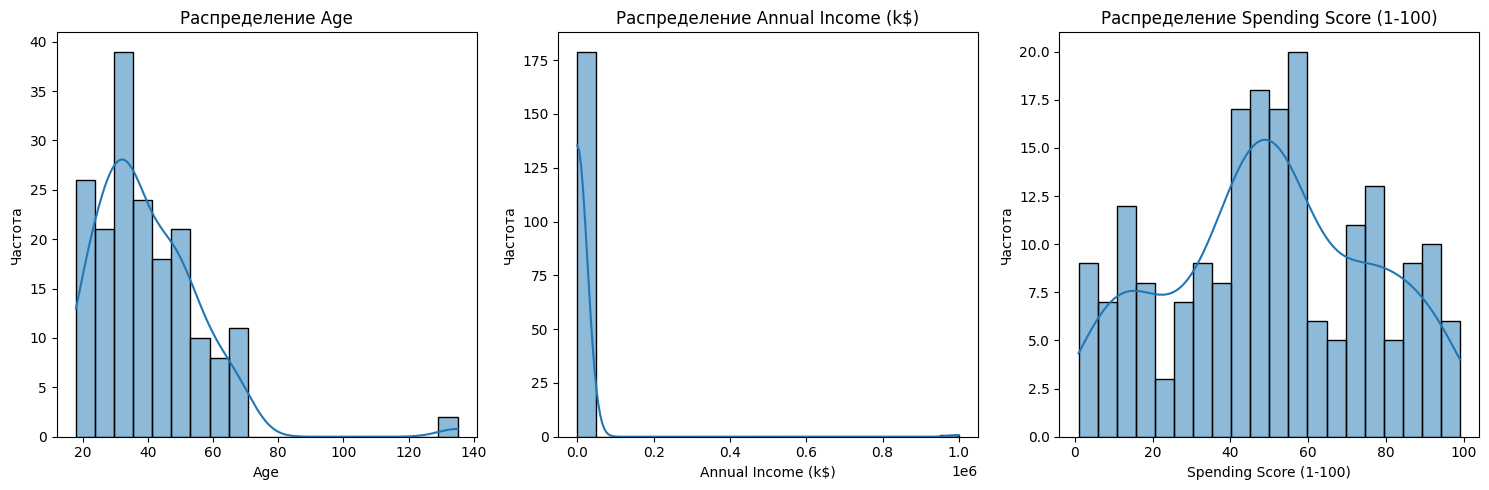

In [73]:
# Построим гистограммы для числовых признаков (Age, Annual Income (k$), Spending Score (1-100)) и посмотрим на их распределение.
# Гистограммы для числовых признаков
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(15, 5))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

## Распределения признаков
Age (Возраст): Распределение возраста близко к нормальному, с пиком в районе 30–40 лет. Это говорит о том, что большинство покупателей находятся в этом возрастном диапазоне.

**Annual Income (k
)
(
Годовойдоход
)
∗
∗
:
Распределениедоходаимеетдвапика
(
около
40
k
)(Годовойдоход)∗∗:Распределениедоходаимеетдвапика(около40k и 80k$), что может указывать на наличие двух групп покупателей с разным уровнем дохода.

Spending Score (1-100) (Рейтинг расходов): Распределение рейтинга расходов равномерное, что указывает на разнообразие покупательского поведения.

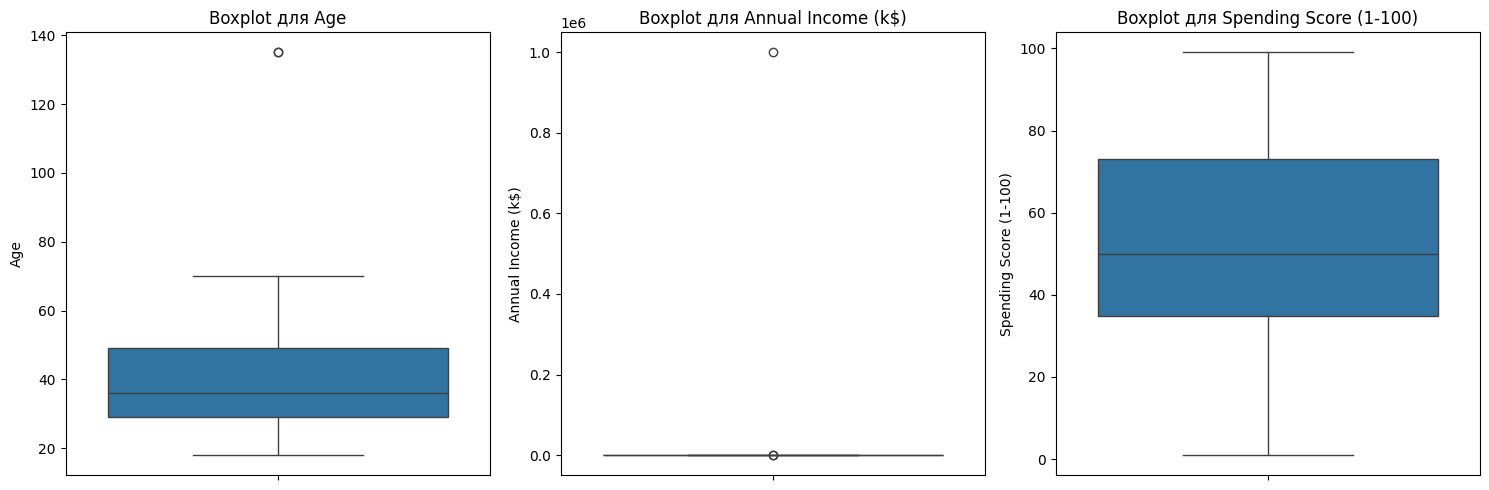

In [74]:
# Построим boxplot для числовых признаков, чтобы выявить выбросы.
# Boxplot для числовых признаков
plt.figure(figsize=(15, 5))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot для {column}')

plt.tight_layout()
plt.show()

## Возможные выбросы или аномалии
Age: В данных есть выброс в районе 130 лет

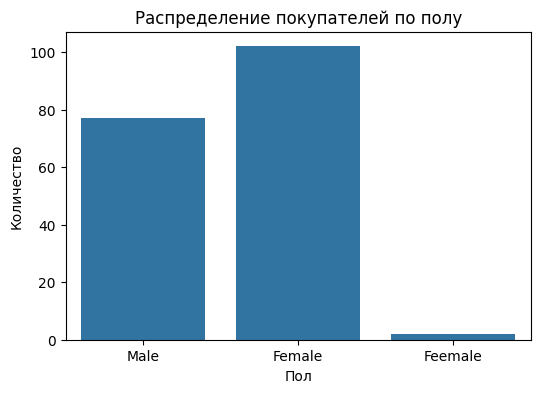

Genre
Female     102
Male        77
Feemale      2
Name: count, dtype: int64


In [75]:
# Проанализируем категориальный признак Genre (пол покупателя)
# Распределение по полу
plt.figure(figsize=(6, 4))
sns.countplot(x='Genre', data=data)
plt.title('Распределение покупателей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

# Статистика по полу
print(data['Genre'].value_counts())

In [76]:
# Исправляем ошибку в столбце Genre
data['Genre'] = data['Genre'].replace('Feemale', 'Female')

# Проверяем результат
print(data['Genre'].value_counts())

Genre
Female    104
Male       77
Name: count, dtype: int64


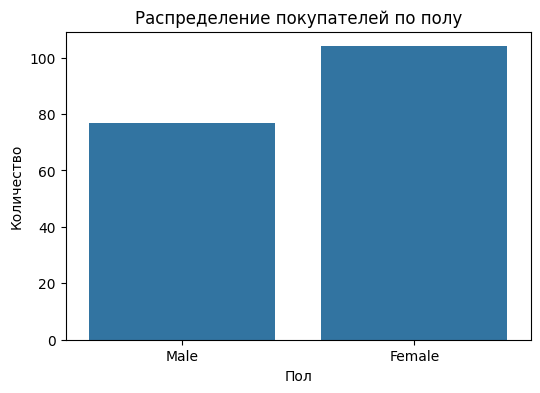

Genre
Female    104
Male       77
Name: count, dtype: int64


In [77]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Genre', data=data)
plt.title('Распределение покупателей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

# Статистика по полу
print(data['Genre'].value_counts())

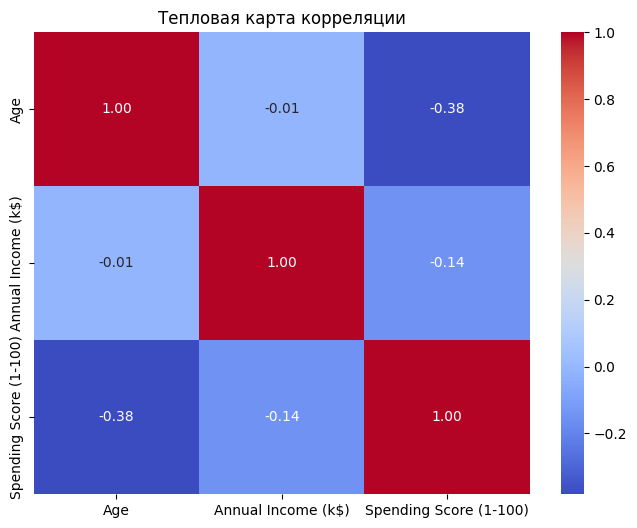

In [78]:
# Тепловая карта корреляции
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции')
plt.show()

Age и Spending Score (1-100): Наблюдается слабая отрицательная корреляция (-0.38), что может указывать на то, что с возрастом покупатели тратят меньше.

Annual Income (k$) и Spending Score (1-100): Корреляция практически отсутствует (-0.14), что говорит о том, что уровень дохода так же не сильно влияет на рейтинг расходов.

Age и Annual Income (k$): Корреляция минимальная (-0.01)

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [126]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split

In [127]:
# Определяем признаки (X) и целевую переменную (y)
data = data.drop('CustomerID', axis=1) # не нужна
X = data.drop('Spending Score (1-100)', axis=1)  # Все колонки, кроме целевой
y = data['Spending Score (1-100)']  # Целевая переменная

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [128]:
print(f"Обучающая выборка: {X_train.shape[0]} строк")
print(f"Тестовая выборка: {X_test.shape[0]} строк")

Обучающая выборка: 160 строк
Тестовая выборка: 40 строк


In [129]:
print(f"Доля тестовой выборки: {len(X_test) / len(data):.2f}")

Доля тестовой выборки: 0.20


### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [130]:
### YOUR CODE HERE ###
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Genre                 15
Age                   15
Annual Income (k$)    18
dtype: int64
Genre                 4
Age                   5
Annual Income (k$)    2
dtype: int64


In [131]:
from sklearn.impute import SimpleImputer

# Заполнение пропусков в числовых признаках
numeric_imputer = SimpleImputer(strategy='median')
X_train[['Age', 'Annual Income (k$)']] = numeric_imputer.fit_transform(X_train[['Age', 'Annual Income (k$)']])

# Заполнение пропусков в категориальных признаках
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train[['Genre']] = categorical_imputer.fit_transform(X_train[['Genre']])

In [132]:
print(X_train.isnull().sum())

Genre                 0
Age                   0
Annual Income (k$)    0
dtype: int64


### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [133]:
median_age = X_train['Age'].median()
X_train.loc[X_train['Age'] > 100, 'Age'] = median_age

# Обработка выбросов в Annual Income (k$)
Q1 = X_train['Annual Income (k$)'].quantile(0.25)
Q3 = X_train['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
X_train.loc[(X_train['Annual Income (k$)'] < Q1 - 1.5 * IQR) | (X_train['Annual Income (k$)'] > Q3 + 1.5 * IQR), 'Annual Income (k$)'] = X_train['Annual Income (k$)'].median()

### Задание 6

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [134]:
print(X_train['Genre'].unique())

['Male' 'Female']


In [135]:
### YOUR CODE HERE ###
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Проверка исходных данных
print("Уникальные значения в Genre:", X_train['Genre'].unique())
print("Пропуски в Genre:", X_train['Genre'].isnull().sum())

# Кодирование категориального признака Genre
encoder = OneHotEncoder(drop='first', sparse_output=False)
genre_encoded = encoder.fit_transform(X_train[['Genre']])  # Кодируем Genre

# Преобразуем результат в DataFrame
genre_encoded_df = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['Genre']))

# Убедимся, что индексы совпадают
genre_encoded_df.index = X_train.index

# Удаляем исходный столбец Genre и добавляем закодированные признаки
X_train = X_train.drop('Genre', axis=1)
X_train = pd.concat([X_train, genre_encoded_df], axis=1)

# Проверка на пропуски после кодирования
print("Пропуски после кодирования:")
print(X_train.isnull().sum())

Уникальные значения в Genre: ['Male' 'Female']
Пропуски в Genre: 0
Пропуски после кодирования:
Age                   0
Annual Income (k$)    0
Genre_Male            0
dtype: int64


In [136]:
print(X_train.head())

      Age  Annual Income (k$)  Genre_Male
108  68.0                63.0         1.0
107  54.0                63.0         1.0
189  36.0               103.0         0.0
14   37.0                20.0         1.0
56   51.0                44.0         0.0


### Задание 7

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [137]:
from sklearn.preprocessing import StandardScaler

# Нормализация численных признаков
scaler = StandardScaler()
X_train[['Age', 'Annual Income (k$)']] = scaler.fit_transform(X_train[['Age', 'Annual Income (k$)']])

In [138]:
print(X_train.head())

          Age  Annual Income (k$)  Genre_Male
108  2.295277            0.212261         1.0
107  1.211960            0.212261         1.0
189 -0.180875            2.109563         0.0
14  -0.103495           -1.827340         1.0
56   0.979821           -0.688958         0.0


### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [139]:
# Заполнение пропусков в тестовой выборке
X_test[['Age', 'Annual Income (k$)']] = numeric_imputer.transform(X_test[['Age', 'Annual Income (k$)']])
X_test[['Genre']] = categorical_imputer.transform(X_test[['Genre']])

In [140]:
print(X_test.isnull().sum())

Genre                 0
Age                   0
Annual Income (k$)    0
dtype: int64


In [141]:
print(X_test['Genre'].unique())

['Female' 'Male']


In [142]:
### YOUR CODE HERE ###
# Обработка выбросов в Age
median_age = X_test['Age'].median()
X_test.loc[X_test['Age'] > 100, 'Age'] = median_age

# Обработка выбросов в Annual Income (k$)
Q1 = X_test['Annual Income (k$)'].quantile(0.25)
Q3 = X_test['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
X_test.loc[(X_test['Annual Income (k$)'] < Q1 - 1.5 * IQR) | (X_test['Annual Income (k$)'] > Q3 + 1.5 * IQR), 'Annual Income (k$)'] = X_test['Annual Income (k$)'].median()

In [143]:
### YOUR CODE HERE ###
# Проверка исходных данных
print("Уникальные значения в Genre:", X_test['Genre'].unique())
print("Пропуски в Genre:", X_test['Genre'].isnull().sum())

# Кодирование категориального признака Genre
encoder = OneHotEncoder(drop='first', sparse_output=False)
genre_encoded = encoder.fit_transform(X_test[['Genre']])  # Кодируем Genre

# Преобразуем результат в DataFrame
genre_encoded_df = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['Genre']))

# Убедимся, что индексы совпадают
genre_encoded_df.index = X_test.index

# Удаляем исходный столбец Genre и добавляем закодированные признаки
X_test = X_test.drop('Genre', axis=1)
X_test = pd.concat([X_test, genre_encoded_df], axis=1)

# Проверка на пропуски после кодирования
print("Пропуски после кодирования:")
print(X_test.isnull().sum())

Уникальные значения в Genre: ['Female' 'Male']
Пропуски в Genre: 0
Пропуски после кодирования:
Age                   0
Annual Income (k$)    0
Genre_Male            0
dtype: int64


In [144]:
print(X_test.head())

      Age  Annual Income (k$)  Genre_Male
58   27.0                46.0         0.0
40   65.0                38.0         0.0
34   49.0                33.0         0.0
102  67.0                62.0         1.0
184  41.0                99.0         0.0


In [145]:
# Нормализация численных признаков в тестовой выборке
X_test[['Age', 'Annual Income (k$)']] = scaler.transform(X_test[['Age', 'Annual Income (k$)']])

In [146]:
print(X_test.head())

          Age  Annual Income (k$)  Genre_Male
58  -0.877293           -0.594093         0.0
40   2.063138           -0.973553         0.0
34   0.825062           -1.210716         0.0
102  2.217897            0.164828         1.0
184  0.206024            1.919833         0.0


In [158]:
# сохраним подготовленные данные
# Сохраняем обучающую выборку
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

# Сохраняем тестовую выборку
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Данные успешно сохранены в файлы: X_train.csv, y_train.csv, X_test.csv, y_test.csv")

Данные успешно сохранены в файлы: X_train.csv, y_train.csv, X_test.csv, y_test.csv
